<a href="https://colab.research.google.com/github/juantijero/ML_HW/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# 2. Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

print("Data loaded and split successfully.")
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)

Data loaded and split successfully.
Training features shape: (455, 30)
Validation features shape: (114, 30)


In [18]:
# 1. Create the scaler object
scaler = StandardScaler()

# 2. Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# 3. Only transform the validation data
X_val_scaled = scaler.transform(X_val)

print("Data scaled successfully.")
print("Original mean of first feature:", X_train[:,0].mean())
print("Scaled mean of first feature:", X_train_scaled[:,0].mean())

Data scaled successfully.
Original mean of first feature: 14.024430769230769
Scaled mean of first feature: -1.3430038522059036e-15


In [27]:
# 1. Train and test LINEAR SVM
print("1. Linear SVM Results")
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear = linear_svm.predict(X_val_scaled)
print(classification_report(y_val, y_pred_linear, target_names=cancer.target_names))

# 2. Train and test NON-LINEAR (RBF) SVM
print("2. Non-Linear (RBF) SVM Results")
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_svm.predict(X_val_scaled)
print(classification_report(y_val, y_pred_rbf, target_names=cancer.target_names))

# 3. Train and test Logistic Regression (for comparison)
print("3. Logistic Regression")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_val_scaled)
print(classification_report(y_val, y_pred_log_reg, target_names=cancer.target_names))

1. Linear SVM Results
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        54
      benign       0.95      0.98      0.97        60

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

2. Non-Linear (RBF) SVM Results
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        54
      benign       0.95      0.98      0.97        60

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

3. Logistic Regression
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        54
      benign       0.92      0.98      0.95        60

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       1

In [20]:
# Experiment with different C and gamma
rbf_svm_tuned = SVC(kernel='rbf', C=10, gamma=0.1, random_state=69)

# Then just fit and predict as normal
rbf_svm_tuned.fit(X_train_scaled, y_train)
y_pred_tuned = rbf_svm_tuned.predict(X_val_scaled)
print(classification_report(y_val, y_pred_tuned, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.96      0.95        54
      benign       0.97      0.95      0.96        60

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [21]:
# Try a smaller C to increase regularization
rbf_svm_tuned = SVC(kernel='rbf', C=0.1, random_state=69)
rbf_svm_tuned.fit(X_train_scaled, y_train)
y_pred_tuned = rbf_svm_tuned.predict(X_val_scaled)
print("--- C=0.1 ---")
print(classification_report(y_val, y_pred_tuned, target_names=cancer.target_names))

# Try a smaller gamma to make the boundary smoother
rbf_svm_tuned = SVC(kernel='rbf', gamma=0.01, random_state=69)
rbf_svm_tuned.fit(X_train_scaled, y_train)
y_pred_tuned = rbf_svm_tuned.predict(X_val_scaled)
print("--- gamma=0.01 ---")
print(classification_report(y_val, y_pred_tuned, target_names=cancer.target_names))

--- C=0.1 ---
              precision    recall  f1-score   support

   malignant       0.94      0.87      0.90        54
      benign       0.89      0.95      0.92        60

    accuracy                           0.91       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

--- gamma=0.01 ---
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        54
      benign       0.94      0.98      0.96        60

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [22]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter "grid" you want to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# 2. Create the GridSearch object
# This will test an RBF SVM
# It will use 5-fold cross-validation (cv=5) to test all combinations
grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=69), # The model to tune
    param_grid,                         # The parameters to test
    cv=5,                               # Number of folds
    scoring='accuracy',                 # The metric to optimize
    verbose=1                           # Shows progress
)

# 3. Run the search
# This will take a minute or two to run
print("Running Grid Search...")
grid_search.fit(X_train_scaled, y_train)

# 4. Print the best results
print("\nGrid Search Complete.")
print("The best parameters found are:", grid_search.best_params_)
print(f"The best accuracy found was: {grid_search.best_score_:.4f}")

Running Grid Search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Grid Search Complete.
The best parameters found are: {'C': 10, 'gamma': 0.01}
The best accuracy found was: 0.9780


In [26]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter "grid" you want to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# 2. Create the GridSearch object
# This will test an RBF SVM
# It will use 5-fold cross-validation (cv=5) to test all combinations
grid_search = GridSearchCV(
    SVC(kernel='linear', random_state=69), # The model to tune
    param_grid,                         # The parameters to test
    cv=5,                               # Number of folds
    scoring='accuracy',                 # The metric to optimize
    verbose=1                           # Shows progress
)

# 3. Run the search
# This will take a minute or two to run
print("Running Grid Search...")
grid_search.fit(X_train_scaled, y_train)

# 4. Print the best results
print("\nGrid Search Complete.")
print("The best parameters found are:", grid_search.best_params_)
print(f"The best accuracy found was: {grid_search.best_score_:.4f}")

Running Grid Search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Grid Search Complete.
The best parameters found are: {'C': 1, 'gamma': 0.001}
The best accuracy found was: 0.9758


In [28]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid for a LINEAR SVM (only C)
param_grid_linear = {
    'C': [0.01, 0.1, 1, 10, 100, 1000]
}

# 2. Create and run the grid search for the linear kernel
print("Running Grid Search for LINEAR SVM...")
grid_search_linear = GridSearchCV(
    SVC(kernel='linear', random_state=42),
    param_grid_linear,
    cv=5,
    scoring='accuracy'
)
grid_search_linear.fit(X_train_scaled, y_train)

# 3. Get predictions and print the final report
y_pred_linear_best = grid_search_linear.predict(X_val_scaled)

print("\n--- Best LINEAR SVM from Grid Search ---")
print(f"Best C value: {grid_search_linear.best_params_}")
print(f"Best average score (from CV): {grid_search_linear.best_score_:.4f}")
print("--- Final Report on Validation Set ---")
print(classification_report(y_val, y_pred_linear_best, target_names=cancer.target_names))

Running Grid Search for LINEAR SVM...

--- Best LINEAR SVM from Grid Search ---
Best C value: {'C': 1}
Best average score (from CV): 0.9758
--- Final Report on Validation Set ---
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        54
      benign       0.95      0.98      0.97        60

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [29]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid for an RBF SVM (C and gamma)
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# 2. Create and run the grid search for the RBF kernel
print("Running Grid Search for NON-LINEAR (RBF) SVM...")
grid_search_rbf = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid_rbf,
    cv=5,
    scoring='accuracy'
)
grid_search_rbf.fit(X_train_scaled, y_train)

# 3. Get predictions and print the final report
y_pred_rbf_best = grid_search_rbf.predict(X_val_scaled)

print("\n--- Best NON-LINEAR (RBF) SVM from Grid Search ---")
print(f"Best C and gamma values: {grid_search_rbf.best_params_}")
print(f"Best average score (from CV): {grid_search_rbf.best_score_:.4f}")
print("--- Final Report on Validation Set ---")
print(classification_report(y_val, y_pred_rbf_best, target_names=cancer.target_names))

Running Grid Search for NON-LINEAR (RBF) SVM...

--- Best NON-LINEAR (RBF) SVM from Grid Search ---
Best C and gamma values: {'C': 10, 'gamma': 0.01}
Best average score (from CV): 0.9780
--- Final Report on Validation Set ---
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        54
      benign       0.92      1.00      0.96        60

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



Training Linear SVR...
Training RBF SVR...

--- SVR Regression Results ---
Linear SVR R-squared (R²): 0.6180
Linear SVR RMSE: 1389562.16
---
RBF SVR R-squared (R²): 0.5970
RBF SVR RMSE: 1427319.78


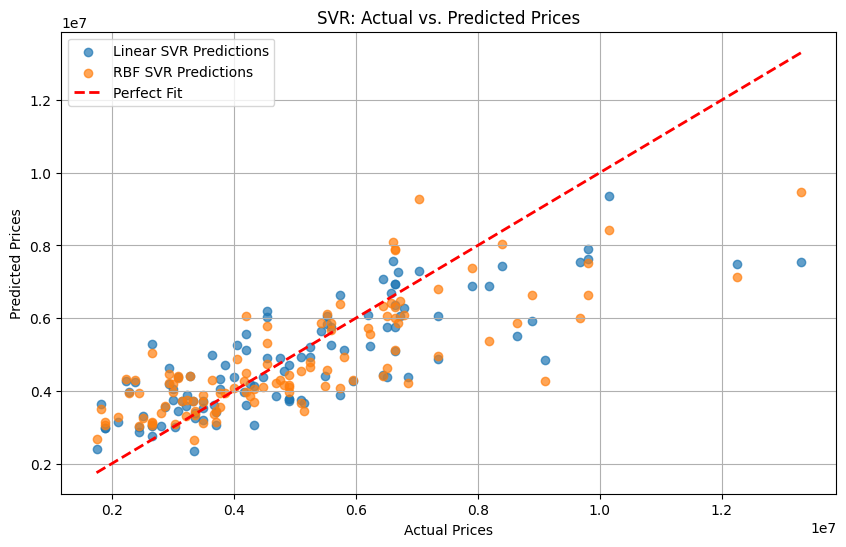

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load and prepare the housing data
# (Make sure your 'Housing.csv' file is uploaded to Colab)
try:
    df = pd.read_csv('Housing.csv')
except FileNotFoundError:
    print("ERROR: 'Housing.csv' not found. Please upload it to your Colab session.")

# Convert all 'yes'/'no' columns to 1/0
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for feature in categorical_features:
    df[feature] = df[feature].map({'yes': 1, 'no': 0})

# 2. Define X and y from the prompt's feature list
feature_names = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]
X = df[feature_names]
y = df['price']

# 3. Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale X and y (CRITICAL for SVR)
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_val_scaled = x_scaler.transform(X_val)

y_scaler = StandardScaler()
# Reshape y to be a 2D column for the scaler
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.to_numpy().reshape(-1, 1))

# 5. Train and test LINEAR SVR
print("Training Linear SVR...")
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train_scaled, y_train_scaled.ravel()) # .ravel() flattens the y-array
y_pred_linear_scaled = linear_svr.predict(X_val_scaled)

# 6. Train and test NON-LINEAR (RBF) SVR
print("Training RBF SVR...")
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_rbf_scaled = rbf_svr.predict(X_val_scaled)

# 7. Inverse transform predictions to get actual dollar amounts
y_pred_linear = y_scaler.inverse_transform(y_pred_linear_scaled.reshape(-1, 1))
y_pred_rbf = y_scaler.inverse_transform(y_pred_rbf_scaled.reshape(-1, 1))

# 8. Print metrics
print("\n--- SVR Regression Results ---")
print(f"Linear SVR R-squared (R²): {r2_score(y_val, y_pred_linear):.4f}")
# FIXED: Calculate RMSE by taking the square root of MSE
print(f"Linear SVR RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_linear)):.2f}")
print("---")
print(f"RBF SVR R-squared (R²): {r2_score(y_val, y_pred_rbf):.4f}")
# FIXED: Do the same for the RBF model
print(f"RBF SVR RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_rbf)):.2f}")

# 9. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_linear, alpha=0.7, label='Linear SVR Predictions')
plt.scatter(y_val, y_pred_rbf, alpha=0.7, label='RBF SVR Predictions')
# Plot the "perfect fit" line
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR: Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# --- Code for HW2 (11-Feature Model) to get R² Score ---

# 1. Prepare data (11 features)
# Note: df (DataFrame) should still be in memory
feature_names = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]
X_b = df[feature_names]
y_b = df['price']
X_train, X_val, y_train, y_val = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

# 2. Scale the data (just like we did for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 3. Add the bias term
X_train_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_val_b = np.c_[np.ones((len(X_val_scaled), 1)), X_val_scaled]

y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()

# 4. Set Hyperparameters (normal alpha because it's scaled)
alpha = 0.1
iterations = 1000
lambda_reg = 0.1 # Regularization

# 5. Initialize and run Gradient Descent
theta = np.zeros(X_train_b.shape[1])
m = len(y_train_np)

for i in range(iterations):
    predictions_train = X_train_b.dot(theta)
    errors = predictions_train - y_train_np

    gradient = (1/m) * X_train_b.T.dot(errors)
    reg_term_gradient = (lambda_reg/m) * theta
    reg_term_gradient[0] = 0
    gradient += reg_term_gradient

    theta = theta - alpha * gradient

# 6. GET THE R² SCORE FOR THIS MODEL
print("\n--- 'Homework 2' (11-Feature From-Scratch Model) Results ---")
y_pred_hw2 = X_val_b.dot(theta)
hw2_r2 = r2_score(y_val, y_pred_hw2)
print(f"Regularized Linear Regression (11-feature) R-squared (R²): {hw2_r2:.4f}")


--- 'Homework 2' (11-Feature From-Scratch Model) Results ---
Regularized Linear Regression (11-feature) R-squared (R²): 0.6437


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load and prepare the housing data
# (Make sure 'Housing.csv' is uploaded to your Colab session)
try:
    df = pd.read_csv('Housing.csv')
except FileNotFoundError:
    print("ERROR: 'Housing.csv' not found. Please upload it to your Colab session.")

# Convert all 'yes'/'no' columns to 1/0
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for feature in categorical_features:
    df[feature] = df[feature].map({'yes': 1, 'no': 0})

# Define the 11 features
feature_names = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]

print("Setup complete. Data is loaded and pre-processed.")

Setup complete. Data is loaded and pre-processed.


In [42]:
# --- 'Homework 2' (11-Feature From-Scratch Model) Results ---

# 1. Prepare data
X_hw2 = df[feature_names]
y_hw2 = df['price']
X_train, X_val, y_train, y_val = train_test_split(X_hw2, y_hw2, test_size=0.2, random_state=42)

# 2. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 3. Add the bias term
X_train_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_val_b = np.c_[np.ones((len(X_val_scaled), 1)), X_val_scaled]

y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()

# 4. Set Hyperparameters
alpha = 0.1
iterations = 1000
lambda_reg = 0.1 # Regularization

# 5. Initialize and run Gradient Descent
theta = np.zeros(X_train_b.shape[1])
m = len(y_train_np)

for i in range(iterations):
    predictions_train = X_train_b.dot(theta)
    errors = predictions_train - y_train_np

    gradient = (1/m) * X_train_b.T.dot(errors)
    reg_term_gradient = (lambda_reg/m) * theta
    reg_term_gradient[0] = 0
    gradient += reg_term_gradient

    theta = theta - alpha * gradient

# 6. GET THE R² SCORE FOR THIS MODEL
y_pred_hw2 = X_val_b.dot(theta)
hw2_r2_score = r2_score(y_val, y_pred_hw2)
print("\n--- 'Homework 2' (11-Feature From-Scratch Model) Results ---")
print(f"Regularized Linear Regression (11-feature) R-squared (R²): {hw2_r2_score:.4f}")


--- 'Homework 2' (11-Feature From-Scratch Model) Results ---
Regularized Linear Regression (11-feature) R-squared (R²): 0.6437


In [43]:
# --- 'Homework 4' (SVR Model) Results ---

# 1. Prepare data
X_hw4 = df[feature_names]
y_hw4 = df['price']
X_train, X_val, y_train, y_val = train_test_split(X_hw4, y_hw4, test_size=0.2, random_state=42)

# 2. Scale X and y (CRITICAL for SVR)
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_val_scaled = x_scaler.transform(X_val)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.to_numpy().reshape(-1, 1))

# 3. Train and test LINEAR SVR
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_linear_scaled = linear_svr.predict(X_val_scaled)
y_pred_linear = y_scaler.inverse_transform(y_pred_linear_scaled.reshape(-1, 1))

# 4. Train and test NON-LINEAR (RBF) SVR
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_rbf_scaled = rbf_svr.predict(X_val_scaled)
y_pred_rbf = y_scaler.inverse_transform(y_pred_rbf_scaled.reshape(-1, 1))

# 5. Print metrics
hw4_linear_r2_score = r2_score(y_val, y_pred_linear)
hw4_rbf_r2_score = r2_score(y_val, y_pred_rbf)

print("\n--- 'Homework 4' (SVR Model) Results ---")
print(f"Linear SVR R-squared (R²): {hw4_linear_r2_score:.4f}")
print(f"RBF SVR R-squared (R²): {hw4_rbf_r2_score:.4f}")


--- 'Homework 4' (SVR Model) Results ---
Linear SVR R-squared (R²): 0.6180
RBF SVR R-squared (R²): 0.5970


In [44]:
print("--- FINAL COMPARISON ---")
print(f"Homework 2 (From-Scratch): R² = {hw2_r2_score:.4f}")
print(f"Homework 4 (Linear SVR):   R² = {hw4_linear_r2_score:.4f}")

--- FINAL COMPARISON ---
Homework 2 (From-Scratch): R² = 0.6437
Homework 4 (Linear SVR):   R² = 0.6180


In [45]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid for an RBF SVR
param_grid_svr = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# 2. Create the GridSearch object
# IMPORTANT: We use scoring='r2' because this is a regression, not classification
print("Running Grid Search for SVR...")
grid_search_svr = GridSearchCV(
    SVR(kernel='rbf'),
    param_grid_svr,
    cv=5,
    scoring='r2', # R-squared is the metric to optimize
    verbose=1
)

# 3. Run the search
# We fit on the SCALED X and y data
grid_search_svr.fit(X_train_scaled, y_train_scaled.ravel())

# 4. Print the best parameters and the best average R² score
print("\nSVR Grid Search Complete.")
print(f"The best parameters found are: {grid_search_svr.best_params_}")
print(f"The best average R² score (from CV) was: {grid_search_svr.best_score_:.4f}")

# 5. Get the final, "real exam" R² score
# We use the best model found to predict on the validation set
y_pred_scaled = grid_search_svr.predict(X_val_scaled)

# We must inverse_transform the predictions to get dollar amounts
y_pred_final = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Now we calculate the final R² score
final_r2 = r2_score(y_val, y_pred_final)

print(f"--- Final Tuned SVR R² on Validation Set: {final_r2:.4f} ---")

Running Grid Search for SVR...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVR Grid Search Complete.
The best parameters found are: {'C': 1000, 'gamma': 0.001}
The best average R² score (from CV) was: 0.6697
--- Final Tuned SVR R² on Validation Set: 0.6295 ---


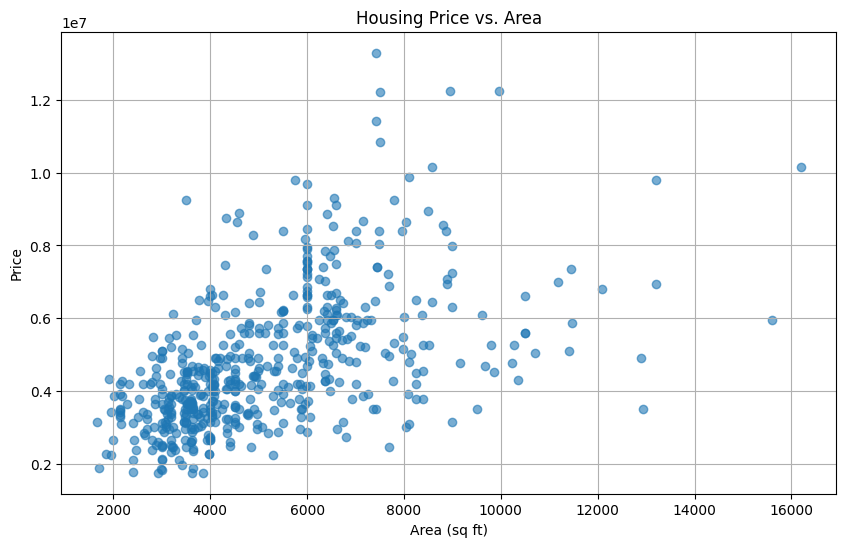

In [46]:
import matplotlib.pyplot as plt

# Plotting area vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.6)
plt.title('Housing Price vs. Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()